In [3]:
#Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path_to_folder = 'gdrive/MyDrive/MathWorks/'

Mounted at /content/gdrive


In [6]:
#Variables
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Read CSV File
df = pd.read_csv(path_to_folder + 'trend_data/2020-2021_us.csv')
year = []
month = []
for curMonth in df['Month']:
  year.append(curMonth.split("/")[1])
  month.append(curMonth.split("/")[0])
del df['Month']


#Add separate month and date
df['Year'] = year
df['Month'] = month
df['MonthYear'] = [(12*int(df['Year'][i]))+int(df['Month'][i]) for i in range(len(df['Year']))] #Represents the amount of months in total (Year*12) + Month


#Create Exclusive Column for workers working exclusively from home
ex = df['Percentage of workers who worked from home exclusively.']
for i in range(len(ex)):
  j = float(ex[i][:-1])/100
  ex[i] = j
df['Exclusive'] = ex


#Create Parttime Column for workers only working part time from home
pt = df['Percentage of workers who worked from home partially.']
for i in range(len(pt)):
  j = float(pt[i][:-1])/100
  pt[i] = j
df['PartTime'] = pt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


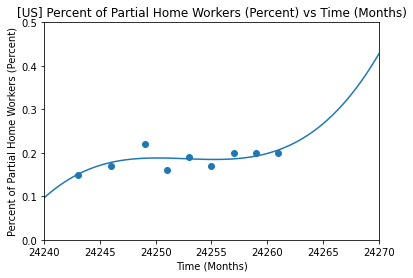

0.4273097131222403


In [7]:
#Model for Partial Home Work
partialModel = numpy.poly1d(numpy.polyfit(list(df['MonthYear']), list(df['PartTime']), 8))
partialModelLine = numpy.linspace(24240, 24270, 100);
plt.scatter(list(df['MonthYear']), list(df['PartTime']))
plt.plot(partialModelLine, partialModel(partialModelLine))
plt.xlim((24240, 24270))
plt.ylim((0, 0.5))
plt.title("[US] Percent of Partial Home Workers (Percent) vs Time (Months)")
plt.ylabel("Percent of Partial Home Workers (Percent)")
plt.xlabel("Time (Months)")
plt.show()
ptR2 = r2_score(list(df['PartTime']), partialModel(list(df['MonthYear'])))
print(ptR2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


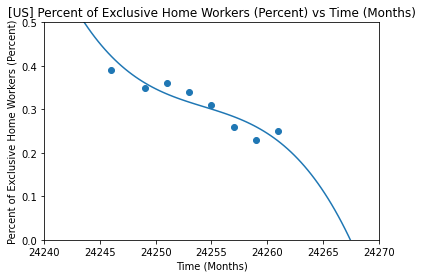

0.9337078896742341


In [8]:
#Model for Exclusive Home Work
exclusiveModel = numpy.poly1d(numpy.polyfit(list(df['MonthYear']), list(df['Exclusive']), 8))
exclusiveModelLine = numpy.linspace(24240, 24270, 100);
plt.scatter(list(df['MonthYear']), list(df['Exclusive']))
plt.plot(exclusiveModelLine, exclusiveModel(exclusiveModelLine))
plt.xlim((24240, 24270))
plt.ylim((0, 0.5))
plt.title("[US] Percent of Exclusive Home Workers (Percent) vs Time (Months)")
plt.ylabel("Percent of Exclusive Home Workers (Percent)")
plt.xlabel("Time (Months)")
plt.show()
exR2 = r2_score(list(df['Exclusive']), exclusiveModel(list(df['MonthYear'])))
print(exR2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


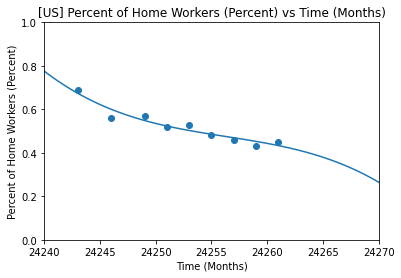

0.9219906334887489


In [23]:
#For all remote workers (full and part time)
ex, pt = list(df['Exclusive']), list(df['PartTime'])
com = [ex[i]+pt[i] for i in range(len(ex))]
remoteModel = numpy.poly1d(numpy.polyfit(list(df['MonthYear']), com, 8))
remoteModelLine = numpy.linspace(24240, 24270, 100);
plt.scatter(list(df['MonthYear']), com)
plt.plot(remoteModelLine, remoteModel(remoteModelLine))
plt.xlim((24240, 24270))
plt.ylim((0, 1))
plt.title("[US] Percent of Home Workers (Percent) vs Time (Months)")
plt.ylabel("Percent of Home Workers (Percent)")
plt.xlabel("Time (Months)")
plt.show()
R2 = r2_score(com, remoteModel(list(df['MonthYear'])))
print(R2)